## 1. Web Scraping

### 1.1. Basic flow in Indeed.com

#### a. List of job posting --> description page of each job


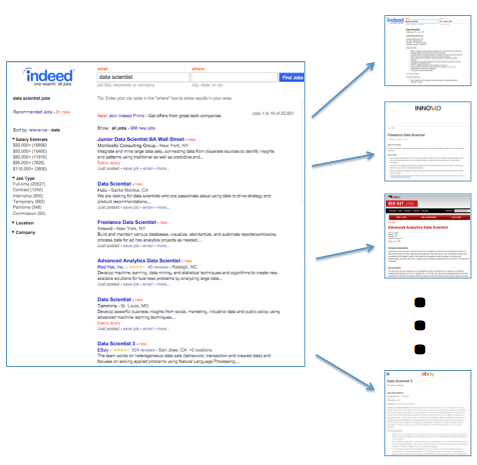

In [29]:
from IPython.display import Image
Image(filename='pic/proj3_1.png')

* code

In [26]:
from bs4 import BeautifulSoup as Soup
import urllib, requests, re, pandas as pd

base_url = 'http://www.indeed.com/jobs?q=data+scientist&jt=fulltime&sort='
sort_by = 'date'
start_from = '&start='

pd.set_option('max_colwidth',500)    
df = pd.DataFrame()

#for page in range(1,101):
for page in range(1,10):
    page = (page-1) * 10
    url = "%s%s%s%d" % (base_url, sort_by, start_from, page)
    target = Soup(urllib.urlopen(url), "lxml")

    targetElements = target.findAll('div', attrs={'class' : '  row  result'})
    
    for elem in targetElements:
        comp_name = elem.find('span', attrs={'itemprop':'name'}).getText().strip()
        job_title = elem.find('a', attrs={'class':'turnstileLink'}).attrs['title']
        home_url = "http://www.indeed.com"
        job_link = "%s%s" % (home_url,elem.find('a').get('href'))
        job_addr = elem.find('span', attrs={'itemprop':'addressLocality'}).getText()
        job_posted = elem.find('span', attrs={'class': 'date'}).getText()

        comp_link_overall = elem.find('span', attrs={'itemprop':'name'}).find('a')
        if comp_link_overall != None:
            comp_link_overall = "%s%s" % (home_url, comp_link_overall.attrs['href'])
        else: comp_link_overall = None

        df = df.append({'comp_name': comp_name, 'job_title': job_title, 
                        'job_link': job_link, 'job_posted': job_posted,
                        'overall_link': comp_link_overall, 'job_location': job_addr,
                        'overall_rating': None, 'wl_bal_rating': None, 
                        'benefit_rating': None, 'jsecurity_rating': None, 
                        'mgmt_rating': None, 'culture_rating': None
                       }, ignore_index=True)

df.tail()

,benefit_rating,comp_name,culture_rating,job_link,job_location,job_posted,job_title,jsecurity_rating,mgmt_rating,overall_link,overall_rating,wl_bal_rating
76,None,Universal Health Services,None,http://www.indeed.com/rc/clk?jk=931ab6cbb0b25dd2,"Palmdale, CA",Just posted,CLS Supervisor Blood Bank 182887 Full time 1st Shift,None,None,None,None,None
77,None,Department Of The Interior,None,http://www.indeed.com/rc/clk?jk=5e16c79347dc800f,"Reston, VA",Just posted,Chemist GS-1320-09/11 (DEN-TERM-JES),None,None,http://www.indeed.com/cmp/Department-of-the-Interior?from=SERP&campaignid=serp-linkcompanyname&jk=5e16c79347dc800f&jcid=b795f294efb0ecd0,None,None
78,None,MedImmune,None,http://www.indeed.com/rc/clk?jk=00406adf6abcaf88,"Frederick, MD 21703",Just posted,QC Scientist I,None,None,http://www.indeed.com/cmp/Medimmune?from=SERP&campaignid=serp-linkcompanyname&jk=00406adf6abcaf88&jcid=23b9a517ff55b9c7,None,None
79,None,CACI International Inc,None,http://www.indeed.com/rc/clk?jk=283f7a9f470723df,"Chantilly, VA",Just posted,Multimedia Specialist Senior Job,None,None,http://www.indeed.com/cmp/CACI-International-Inc?from=SERP&campaignid=serp-linkcompanyname&jk=283f7a9f470723df&jcid=290a4498a64fc044,None,None
80,None,"Measured Progress, Inc.",None,http://www.indeed.com/rc/clk?jk=fe2aa6d6bed597af,"Dover, NH 03820",Just posted,Psychometrician/Research Scientist - Senior,None,None,"http://www.indeed.com/cmp/Measured-Progress,-Inc.?from=SERP&campaignid=serp-linkcompanyname&jk=fe2aa6d6bed597af&jcid=6a8d5c50a6edc6d2",None,None


#### b. List of jobs --> description page of each company

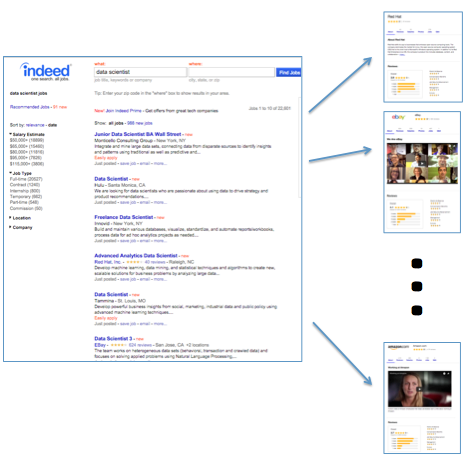

In [15]:
Image(filename='pic/proj3_2.png')

#### c. Description page of each company page

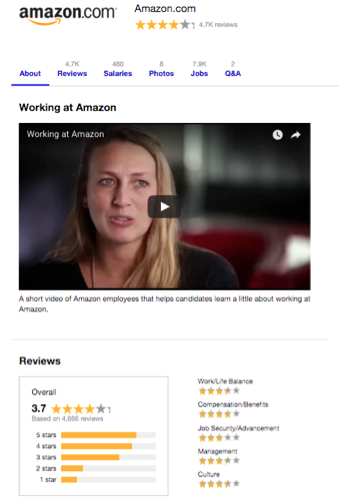

In [17]:
Image(filename='pic/proj3_3.png')

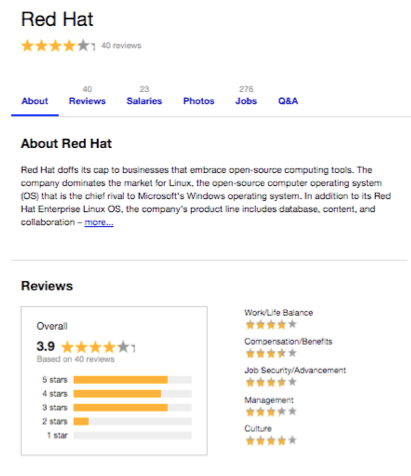

In [18]:
Image(filename='pic/proj3_4.png')

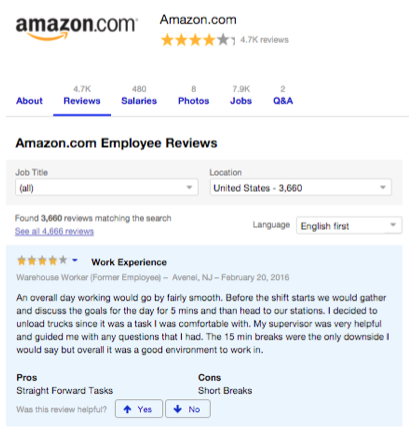

In [28]:
Image(filename='pic/proj3_5.png')

In [33]:
#http://www.indeed.com/salaries/Data-Scientist-Salary?start=620
from bs4 import BeautifulSoup as Soup
import urllib, requests, re, pandas as pd, numpy as np
df_received_for_review = pd.read_csv('./data/Indeed_comp_complete_for_review.csv')
df_for_review = pd.DataFrame()
comp_set = set() # for duplicate check
print len(df_received_for_review)

#for i in range(0,len(df_received_for_review)): 
for i in range(0, 10): 
    target_comp_name = df_received_for_review.iloc[i]['comp_name']
    #comp_set.add(target_comp_name)
    
    url_2nd = df_received_for_review.iloc[i]['overall_link'] 
    
    if url_2nd == None or isinstance(url_2nd, float): 
        print "NANNNNNNN"
        url_cmp_review = ""
    else: 
        url_1stpart = re.search("from=", url_2nd) 
        url_cmp_review = "%s%s" % (url_2nd[:url_1stpart.start()-1], "/reviews")

    if url_cmp_review != "":
        target_for_review = Soup(urllib.urlopen(url_cmp_review), "lxml")
        
        comp_rating_overall = target_for_review.find("span", {"class": "cmp-star-large-on"}).attrs['style']
        comp_rating_overall = re.sub('[width: ]', '', comp_rating_overall)
        comp_rating_overall = re.sub('[px;]', '', comp_rating_overall)
        comp_rating_overall = round((float(comp_rating_overall)*5.0)/120, 1)
    
        targetElements = target_for_review.find('div', attrs={'class' : 'cmp-review'})
        
        review_summary = targetElements.find('div', attrs={'class':'cmp-review-title'})#.getText().strip()
        if review_summary != None:
            review_summary = review_summary.getText().strip()
        else: review_summary = ""
            
        review_pros = targetElements.find('div', attrs={'class':'cmp-review-pro-text'})
        if review_pros != None:
            review_pros = review_pros.getText().strip()
        else: review_pros = ""
            
        review_cons = targetElements.find('div', attrs={'class':'cmp-review-con-text'})        
        if review_cons != None:
            review_cons = review_cons.getText().strip()
        else: review_cons = ""
        
        review_vote_count = targetElements.find('span', attrs={'class':'cmp-vote-count'})        
        if review_vote_count.getText().strip() == "":
            review_vote_count = "0"
        else: review_vote_count = review_vote_count.getText().strip()
            
        if target_comp_name not in comp_set:
            comp_set.add(target_comp_name)
            df_for_review = df_for_review.append({
                    'comp_name': target_comp_name, 'comp_review_link': url_cmp_review, 
                    'review_summary': review_summary, 'review_pros': review_pros, 
                    'review_cons': review_cons, 'review_votes': review_vote_count,
                    'comp_rating_overall': comp_rating_overall
                    }, ignore_index=True)

            print "%d | %s | %s" % (i, len(df_for_review), df_for_review.iloc[len(df_for_review)-1]['comp_name'])

        else: 
            print "-Duplicates!!!!", target_comp_name, " at ", i
        
df_for_review.tail()

611
0 | 1 | Salesforce
1 | 2 | Measured Progress, Inc.
2 | 3 | BOEING
3 | 4 | Home Depot
4 | 5 | MacAulay-Brown, Inc.
5 | 6 | Excel Partners
-Duplicates!!!! MacAulay-Brown, Inc.  at  6
-Duplicates!!!! BOEING  at  7
8 | 7 | Kelly Services
-Duplicates!!!! BOEING  at  9


,comp_name,comp_rating_overall,comp_review_link,review_cons,review_pros,review_summary,review_votes
2,BOEING,4.1,http://www.indeed.com/cmp/Boeing/reviews,,,PRODUCTIVE AND FUN WORKING,4
3,Home Depot,3.8,http://www.indeed.com/cmp/Home-Depot/reviews,,,good,3
4,"MacAulay-Brown, Inc.",4.0,"http://www.indeed.com/cmp/Macaulay--brown,-Inc./reviews",Information sharing between business units,Corporate leadership,Good company to work for,1
5,Excel Partners,3.8,http://www.indeed.com/cmp/Excel-Partners/reviews,,,"Productive, Skilled",1
6,Kelly Services,3.9,http://www.indeed.com/cmp/Kelly-Services/reviews,"benefits, pay",got my foot in the door.,Temp Job,8


### 4. Dice.com (for keywords analysis) 

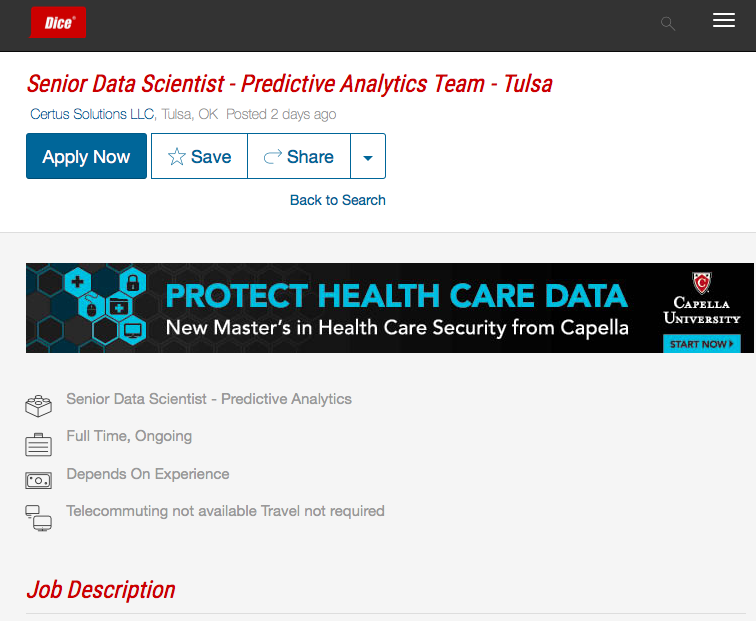

In [20]:
Image(filename='pic/proj3_6.png')

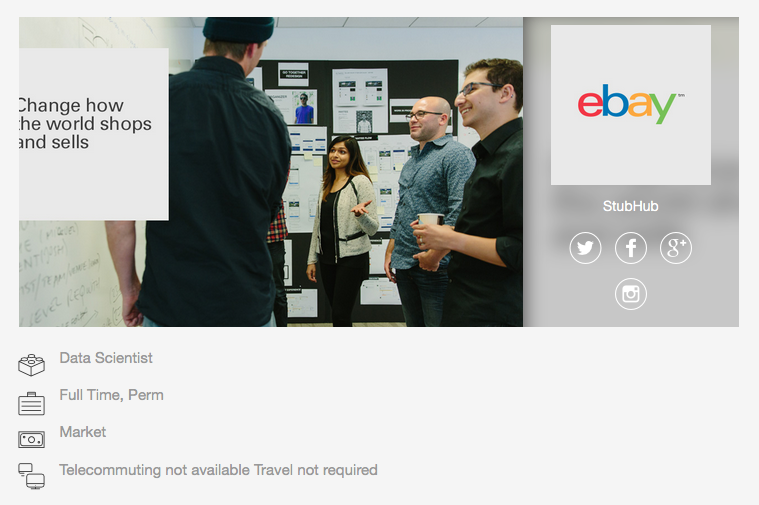

In [21]:
Image(filename='pic/proj3_7.png')

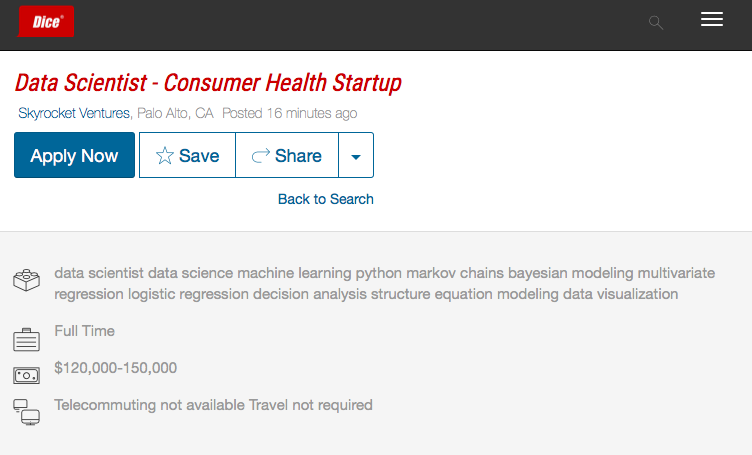

In [22]:
Image(filename='pic/proj3_8.png')

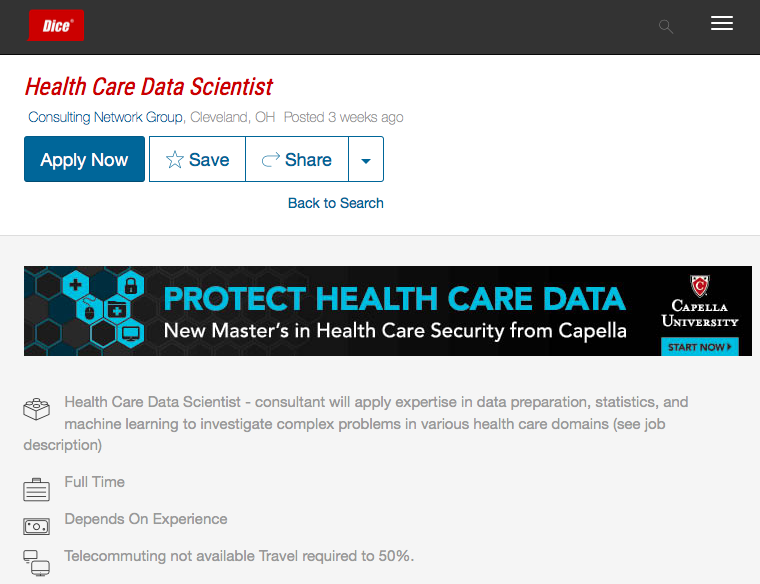

In [23]:
Image(filename='pic/proj3_9.png')

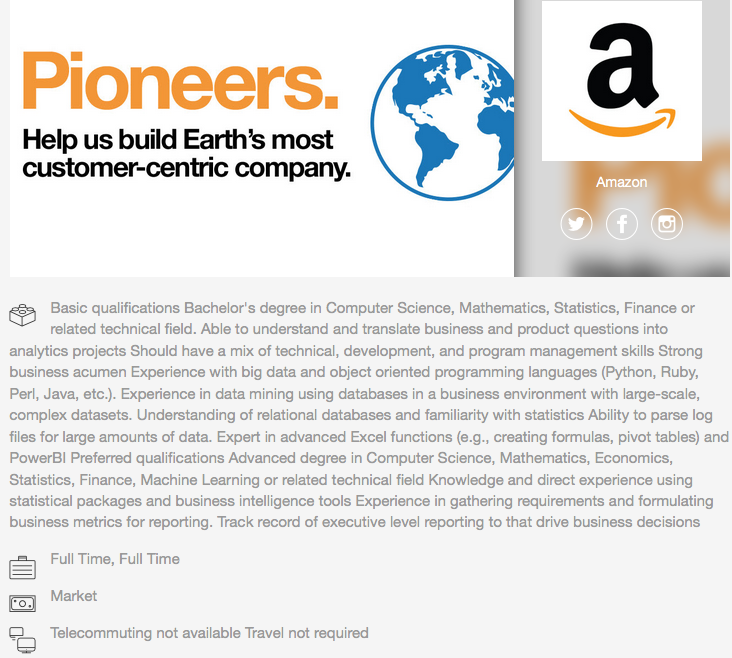

In [24]:
Image(filename='pic/proj3_10.png')

* code

In [36]:
home_url = "http://www.dice.com"
search_query = 'https://www.dice.com/jobs/q-data_scientist-sort-date-limit-30-startPage-'
seqrch_query_tail = '-limit-30-jobs?searchid='
#search_id = '8228972714860'
#search_id = '5492609230718'
search_id = '9495669924949'
#search_id = '5492609230718'

dfdice = pd.DataFrame()
pd.set_option('max_colwidth',500)    


In [37]:

# 34109 jobs in 1131 pages.
for page in range(400,500): 
    #url = "%s%d%s%s" % (search_query, page, seqrch_query_tail, search_id)
    
    target = Soup(urllib.urlopen(url), "lxml")
    #print target
    mainTargetElement = target.find('div', attrs={'id' : 'search-results-control'})

    if mainTargetElement != None:
        
        targetElements = mainTargetElement.findAll('div', attrs={'class', 'serp-result-content'})
        for elem in targetElements:

            job_elem = elem.find('a', attrs={'class':'dice-btn-link'})
            if job_elem != None:
                job_title = job_elem.getText().strip() 
            else: job_title = ""
            #print job_title

            if job_elem != None:
                job_link = job_elem.attrs['href']

            else: job_link = ""

            comp_name_li = elem.find('li', attrs={'class': 'employer'})#.find('a', attrs={'class': 'dice-btn-link"'})
            comp_name = comp_name_li.find('a', attrs={'class': 'dice-btn-link'}).getText().strip()

            dfdice = dfdice.append({'comp_name': comp_name, 
                                    'job_title': job_title,
                                    'job_link': job_link
                    }, ignore_index=True)
            print "%d | %s | %s" % (page, len(dfdice), dfdice.iloc[len(dfdice)-1]['comp_name'])
            
print len(dfdice)
dfdice.tail()  

0


""


### 5. Next steps

##### Hierarchical clustering (+dendrogram)

##### Analyze Job Description in more detail
- Skills most frequently mentioned
- Skills required in each industry

##### Add some features of each company 
- Show top 5 most frequent features of each cluster...

